## Simple Machine Learning Antimalware in Python
I'll try to explain how can you use the **Benign & Malicious PE Files** dataset.

I built the dataset with Python pefile library. The malwares are from [VirusShare](https://virusshare.com/) and the benign software are from a windows server SO.

In [36]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [37]:
#Loading dataset from training
data = pd.read_csv('dataset_malwares.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name','Malware'], axis=1)
y = data['Malware']


In [38]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [39]:
data.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
17996,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,0,0,0,0,0,49152,0,38912
15684,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,1,1,0,0,9492,16384,0,0
7091,23117,80,2,0,4,15,65535,0,184,0,...,3758096512,0,6,11,0,0,1173284,1146880,0,586240
5374,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,59,0,0,48292,57344,0,0
174,23117,80,2,0,4,15,65535,0,184,0,...,3791650912,0,1,4,0,0,61652,61440,0,0


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [42]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.035986,-0.048061,-0.042098,-0.039739,-0.041661,0.147694,-0.016298,-0.035396,-0.030927,...,-2.647724,0.0,-0.785105,-0.798323,-0.091859,-0.015563,-0.082080,-0.160103,-0.020418,-0.038174
1,0.0,-0.035986,-0.048061,-0.042098,-0.039739,-0.041661,0.147694,-0.016298,-0.035396,-0.030927,...,-2.647724,0.0,-0.656530,-0.790528,-0.091859,-0.015563,-0.080133,-0.171943,-0.020418,-0.040104
2,0.0,-0.097083,-0.048757,-0.042098,-0.039739,-0.025786,0.147694,-0.016298,-0.035396,-0.030927,...,1.017108,0.0,-0.013654,-0.712579,-0.091859,-0.015563,0.158608,0.236553,-0.020418,-0.011022
3,0.0,-0.035986,-0.048061,-0.042098,-0.039739,-0.041661,0.147694,-0.016298,-0.035396,-0.030927,...,0.100900,0.0,-0.656530,-0.338423,-0.091859,-0.015563,-0.072173,-0.157143,-0.020418,-0.040104
4,0.0,-0.097083,-0.048757,-0.042098,-0.039739,-0.025786,0.147694,-0.016298,-0.035396,-0.030927,...,1.074370,0.0,-0.656530,-0.767143,-0.091859,-0.015563,-0.069433,-0.155663,-0.020418,-0.040104


In [43]:
skpca = PCA(n_components=55)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9845569938132174


In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

In [45]:
# Random Forest Classifier
model_rf = RFC(n_estimators=100, random_state=0, 
               oob_score=True, max_depth=16, 
               max_features='sqrt')
model_rf.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred_rf = model_rf.predict(X_test_pca)

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0)

# AdaBoost Classifier (without specifying base_estimator)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# Extra Trees Classifier
model_et = ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# List of models
models = [model_rf, model_dt, model_ada, model_et]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees"]

# Training and evaluating each model
for model, model_name in zip(models, model_names):
    model.fit(X_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_pred, y_test))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       983
           1       0.99      0.98      0.99      2940

    accuracy                           0.98      3923
   macro avg       0.97      0.98      0.98      3923
weighted avg       0.98      0.98      0.98      3923


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1002
           1       0.98      0.98      0.98      2921

    accuracy                           0.97      3923
   macro avg       0.96      0.96      0.96      3923
weighted avg       0.97      0.97      0.97      3923



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       984
           1       0.98      0.98      0.98      2939

    accuracy                           0.97      3923
   macro avg       0.96      0.96      0.96      3923
weighted avg       0.97      0.97      0.97      3923


Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       952
           1       0.99      0.97      0.98      2971

    accuracy                           0.97      3923
   macro avg       0.96      0.97      0.96      3923
weighted avg       0.97      0.97      0.97      3923



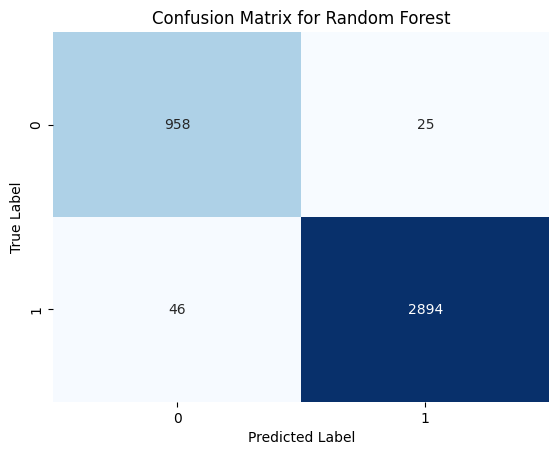

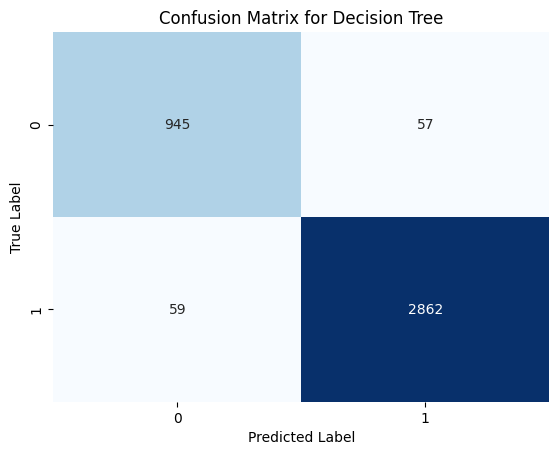

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


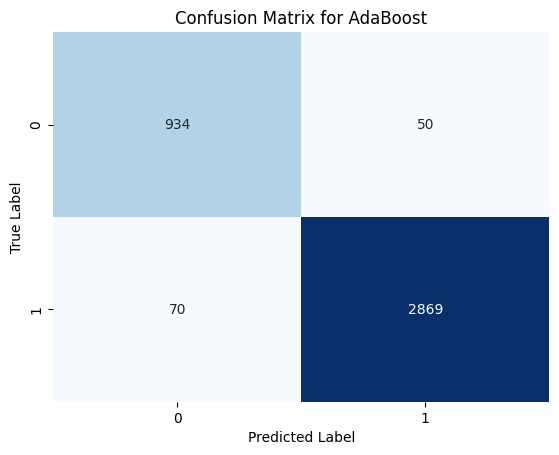

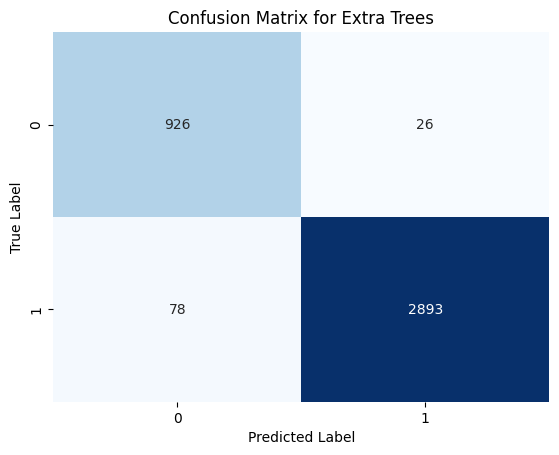

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = [
    RFC(n_estimators=100, random_state=0, oob_score=True, max_depth=16, max_features='sqrt'),
    DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)
]

# Model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees"]

# Train, predict, and evaluate each model
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_pca, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_pca)
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [47]:
from sklearn.pipeline import Pipeline
import joblib

# Define the pipeline
pipe_rf = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_rf)])
pipe_dt = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_dt)])
pipe_ada = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_ada)])
pipe_et = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_et)])

# List of pipelines
pipelines = [pipe_rf, pipe_dt, pipe_ada, pipe_et]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees"]

# Train and evaluate each pipeline
for pipeline, model_name in zip(pipelines, model_names):
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Save the pipeline
    joblib.dump(pipeline, f'{model_name.lower()}_pipeline.pkl')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [48]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["random_forest", "decision_tree", "adaboost", "extra_trees"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'adaboost_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.503732  0.496268   
1                                 vlc-3.0.2-win64.exe  0.499400  0.500600   
2                                       stinger32.exe  0.426111  0.573889   
3                                SpotifyFullSetup.exe  0.509473  0.490527   
4                                    uftp_english.exe  0.496620  0.503380   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.485389  0.514611   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.480841  0.519159   
7                                   reverse_shell.exe  0.487563  0.512437   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.489836  0.510164   
9                             ScratchInstaller1.4.exe  0.494320  0.505680   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.486713  0.513287   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.486240  0.513760   

In [49]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["random_forest", "decision_tree", "adaboost", "extra_trees"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'decision tree_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.000000  1.000000   
1                                 vlc-3.0.2-win64.exe  1.000000  0.000000   
2                                       stinger32.exe  1.000000  0.000000   
3                                SpotifyFullSetup.exe  1.000000  0.000000   
4                                    uftp_english.exe  1.000000  0.000000   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.000000  1.000000   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.000000  1.000000   
7                                   reverse_shell.exe  0.000000  1.000000   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.000000  1.000000   
9                             ScratchInstaller1.4.exe  1.000000  0.000000   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.000000  1.000000   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.000000  1.000000   

In [50]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["random_forest", "decision_tree", "adaboost", "extra_trees"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'random forest_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.940000  0.060000   
1                                 vlc-3.0.2-win64.exe  0.810217  0.189783   
2                                       stinger32.exe  0.170283  0.829717   
3                                SpotifyFullSetup.exe  0.628635  0.371365   
4                                    uftp_english.exe  0.560575  0.439425   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.240269  0.759731   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.001219  0.998781   
7                                   reverse_shell.exe  0.050333  0.949667   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.021964  0.978036   
9                             ScratchInstaller1.4.exe  0.372384  0.627616   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.051950  0.948050   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.002347  0.997653   